# Implementar o batch gradient descent

Desenvolva aqui o seu código para realizar o *batch gradient descent* a partir dos códigos [Gradiente Descendente por Lote](#gdl) (batch) e [Gradiente Descendente Estocástico](#gde), que fazem parte do notebook <a "href=https://t-adessowiki.fee.unicamp.br/user/lrittner/notebooks/ia368z_2s2017/aluno/week03/Regressao-Linear.ipynb">Regressao-Linear.ipynb</a>. A ideia é que o tamanho do lote possa assumir qualquer valor entre 1 e o número total de amostras. 

## Entrega do exercício

A entrega do exercício consiste do notebook com o seu código e a [figura salva conforme código abaixo](#figura). A figura deve ser composta por 3 plotagens do erro ao longo das iterações considerando um tam_lote = 1, tam_lote = T e tam_lote = num_amostras. Escolha T de tal forma que num_amostras/T não seja inteiro.

**Não altere o nome do notebook, o nome da figura salva, nem as dimensões da figura e o arranjo do subplot, pois estes parâmetros são necessários para facilitar a correção.**

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [34]:
def mini_batch_gradient_descent(X, y, w_init,b=20, lr=0.01, n_epochs=1000):
    '''
    Perform mini batch gradient descent to learn w
    by taking n_epochs gradient steps with learning
    rate lr
    Dados rotulados: X.shape:(M,2) e y.shape:(M,1)
    Parâmetro inicial: w_init.shape:(1,2)
    output: w_history:(num_epochs+1,2)
    '''
    M = y.size
    w_history = np.zeros((2,n_epochs+1))
    wT = w_init.T
    w_history[:,0] = wT[:,0]

    for i in range(n_epochs):
        j = np.random.randint(M,size=b)
        wT = wT - lr * (2.0 / b) * (X[j].T).dot(X[j].dot(wT) - y[j])
        w_history[:,i+1]=wT[:,0]
    return w_history.T

def compute_cost(X_b, y, wT):
    '''
    Compute cost for linear regression
    (X,y): amostras rotuladas X(n_samples,2) e y(n_samples,)
    wT: vetor coluna de parâmetros (já transposto)
       aceita tanto shape (2,1) Para um caso como (2,n_history) para n_history casos
    '''
    e = X_b.dot(wT) - y
    J = (e * e).mean(axis=0)
    return J

In [50]:
# Load iris dataset
iris = load_iris()

data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

# Load X_b and y sets
X_b = data[:,0:1]
y = data[:,1:2]

X_b -= X_b.min()
X_b /= X_b.max()    # normalização
y -= y.min()
y /= y.max()

# We must concatenate the X_b with ones column to match the
# multiplicator factor of wT[0]
X_b = np.concatenate((np.ones((X_b.shape[0],1)),X_b),axis=1)

w_init = np.zeros((1,2))

# Stochastic
w = mini_batch_gradient_descent(X_b, y, w_init,b=1, lr=0.01, n_epochs=100)
J_history_stochastic = compute_cost(X_b,y,w.T)
print(w[-1])

# Mini-batch (b=20)
w = mini_batch_gradient_descent(X_b, y, w_init,b=3, lr=0.01, n_epochs=100)
J_history_minibatch = compute_cost(X_b,y,w.T)
print(w[-1])
# Stochastic
w = mini_batch_gradient_descent(X_b, y, w_init,b=y.size, lr=0.01, n_epochs=100)
J_history_batch = compute_cost(X_b,y,w.T)

[ 0.40324204  0.27654699]
[ 0.45142671  0.26847549]


### Gerando a figura para correção automática

<a id='figura'></a>

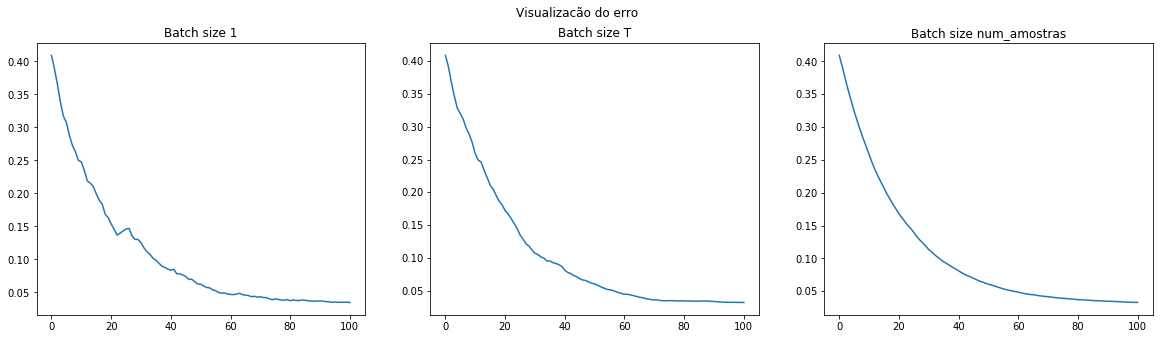

In [51]:
fig = plt.figure(figsize=(20,5))
plt.suptitle('Visualizacão do erro')

ax = fig.add_subplot(131)
plt.title("Batch size 1")
ax.plot(J_history_stochastic)

ay = fig.add_subplot(132)
plt.title("Batch size T")
ay.plot(J_history_minibatch)

az = fig.add_subplot(133)
plt.title("Batch size num_amostras")
az.plot(J_history_batch)

plt.savefig('my_sgd_minibatch.png')

### Gradiente Descendente por Lote (*batch*)

<a id='gdl'></a>

In [1]:
def batch_gradient_descent(X, y, w_init, lr, n_epochs):
    '''
    Perform batch gradient descent to learn w
    by taking n_epochs gradient steps with learning
    rate lr
    Dados rotulados: X.shape:(M,2) e y.shape:(M,1)
    Parâmetro inicial: w_init.shape:(1,2)
    output: w_history:(num_epochs+1,2)
    '''
    M = y.size
    w_history = np.zeros((2,n_epochs+1))
    wT = w_init.T
    w_history[:,0] = wT[:,0]

    for i in range(n_epochs):
        wT = wT - lr * (2.0 / M) * (X.T).dot(X.dot(wT) - y)
        w_history[:,i+1]=wT[:,0]
    return w_history.T

### Gradiente Descendente Estocástico

<a id='gde'></a>

In [2]:
def stochastic_gradient_descent(X, y, w_init, lr, n_epochs):
    '''
    Perform stochastic gradient descent to learn w
    by taking n_epochs times number of samples 
    gradient steps with learning rate lr
    Dados rotulados: X.shape:(M,2) e y.shape:(M,1)
    Parâmetro inicial: w_init.shape:(1,2)
    output: w_history:(num_epochs+1,2)
    '''
    M = y.size
    w_history = np.zeros((2,(M*n_epochs)+1))
    wT = w_init.T
    w_history[:,0] = wT[:,0]

    for i in range(n_epochs):
        for jj in range(M):
            j = np.random.randint(M)
            wT = wT - lr * 2.0 * (X[j:j+1,:].T).dot(X[j:j+1,:].dot(wT) - y[j:j+1])
            w_history[:,jj+(i*M)+1] = wT[:,0]
    return w_history.T

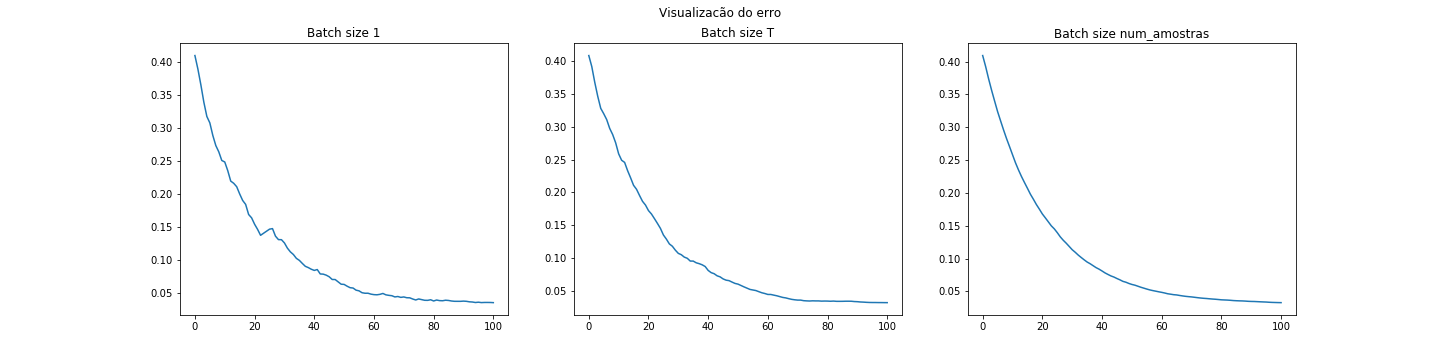

In [52]:
import IPython
img = IPython.display.Image(filename='my_sgd_minibatch.png')
img
